# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [6]:
import pandas as pd
#passo 1 - importar a base de dados
tabela = pd.read_csv('barcos_ref.csv')
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [7]:
#passo 2- fazer o tratamento
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB


None

In [16]:
#passo 3 - analise expoloratoria
display(tabela.corr()[['Preco']])


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


In [22]:
#passo 4 - modelagem + algoritimo (Aqui entra a I.A)
#separar os dados de X e Y
y = tabela['Preco']
x = tabela.drop('Preco', axis=1)

#separar os dados de treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [18]:
#passo 5 - Criação da I.A e treino

#Importar a inteligencia artificial
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Criar a inteligencia artificial
regressao_linear = LinearRegression()
arvore_de_decisao = RandomForestRegressor()

#Treinar a inteligencia artificial
regressao_linear.fit(x_treino, y_treino)
arvore_de_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [28]:
from sklearn.metrics import r2_score

previsao_linear = regressao_linear.predict(x_teste)
previsao_arvore = arvore_de_decisao.predict(x_teste)

print(r2_score(y_teste, previsao_linear))
print(r2_score(y_teste, previsao_arvore))

0.3651489372095563
0.9598317561204344


Matplotlib is building the font cache; this may take a moment.


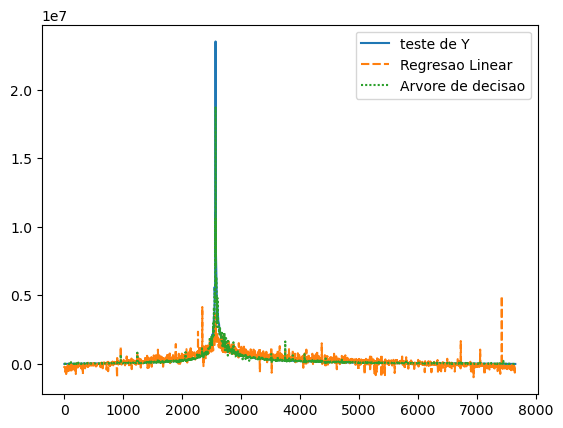

In [30]:
#fazer uma tabela auxiliar para vizualizar os preços
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['teste de Y'] = y_teste
tabela_auxiliar['Regresao Linear'] = previsao_linear
tabela_auxiliar['Arvore de decisao'] = previsao_arvore

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tabela_auxiliar)

plt.show()

In [51]:
#aplicar a IA na tabela necessária
nova_tabela = pd.read_csv('novos_barcos.csv')
resultado = arvore_de_decisao.predict(nova_tabela)
nova_tabela['Preco'] = resultado
display(nova_tabela)

#salvar a planilha
nova_tabela.to_excel('novos_barcos.xlsx', index=False)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material,Preco
0,2,3,2023,3.0,1.5,1,5236.8675
1,2,1,2023,3.8,1.9,2,9216.0400
2,3,2,1999,6.2,3.0,2,20001.8000


In [8]:
!git push --set-upstream ciencia-de-dados master


fatal: 'ciencia-de-dados' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
